In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
### Part 1: Analyzing Best-Seller Trends Across Product Categories
#Objective: Understand the relationship between product categories and their best-seller status.

# 1. Crosstab Analysis:
#Create a crosstab between the product category and the isBestSeller status.
#Are there categories where being a best-seller is more prevalent?

In [3]:
df = pd.read_csv("amz_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
df.drop("uid", inplace=True, axis=1)

In [5]:
df = df[df.columns[df.isnull().mean() < 0.8]]

In [6]:
df.select_dtypes("number").nunique()

stars                   42
reviews              19446
price                82916
boughtInLastMonth       25
dtype: int64

In [7]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 45]
potential_categorical_from_numerical

,stars,boughtInLastMonth
0,4.7,0
1,4.7,0
2,4.7,0
3,4.7,0
4,4.6,0
...,...,...
2443646,0.0,0
2443647,0.0,0
2443648,0.0,0
2443649,4.3,0


In [8]:
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [9]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [10]:
#2. Statistical Tests:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
#Compute Cramér's V to understand the strength of association between best-seller status and category.

In [11]:
from scipy.stats import chi2_contingency

In [12]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [13]:
from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

0.1222829439760564

<Axes: xlabel='category'>

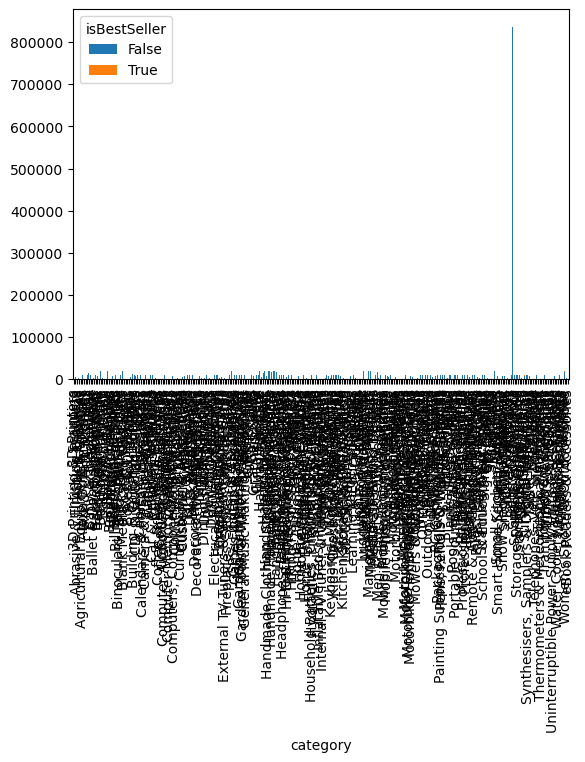

In [14]:
# 3. Visualizations: Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_result.plot(kind="bar", stacked=True)

In [15]:
# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
# Objective: Investigate how different product categories influence product prices.
# Preliminary Step: Remove outliers in product prices.
# For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third 
# quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

In [25]:

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
filtered_df

,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [ ]:
#Violin Plots:
#Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count 
# for better visualization.
#Which product category tends to have the highest median price? Don't filter here by top categories.

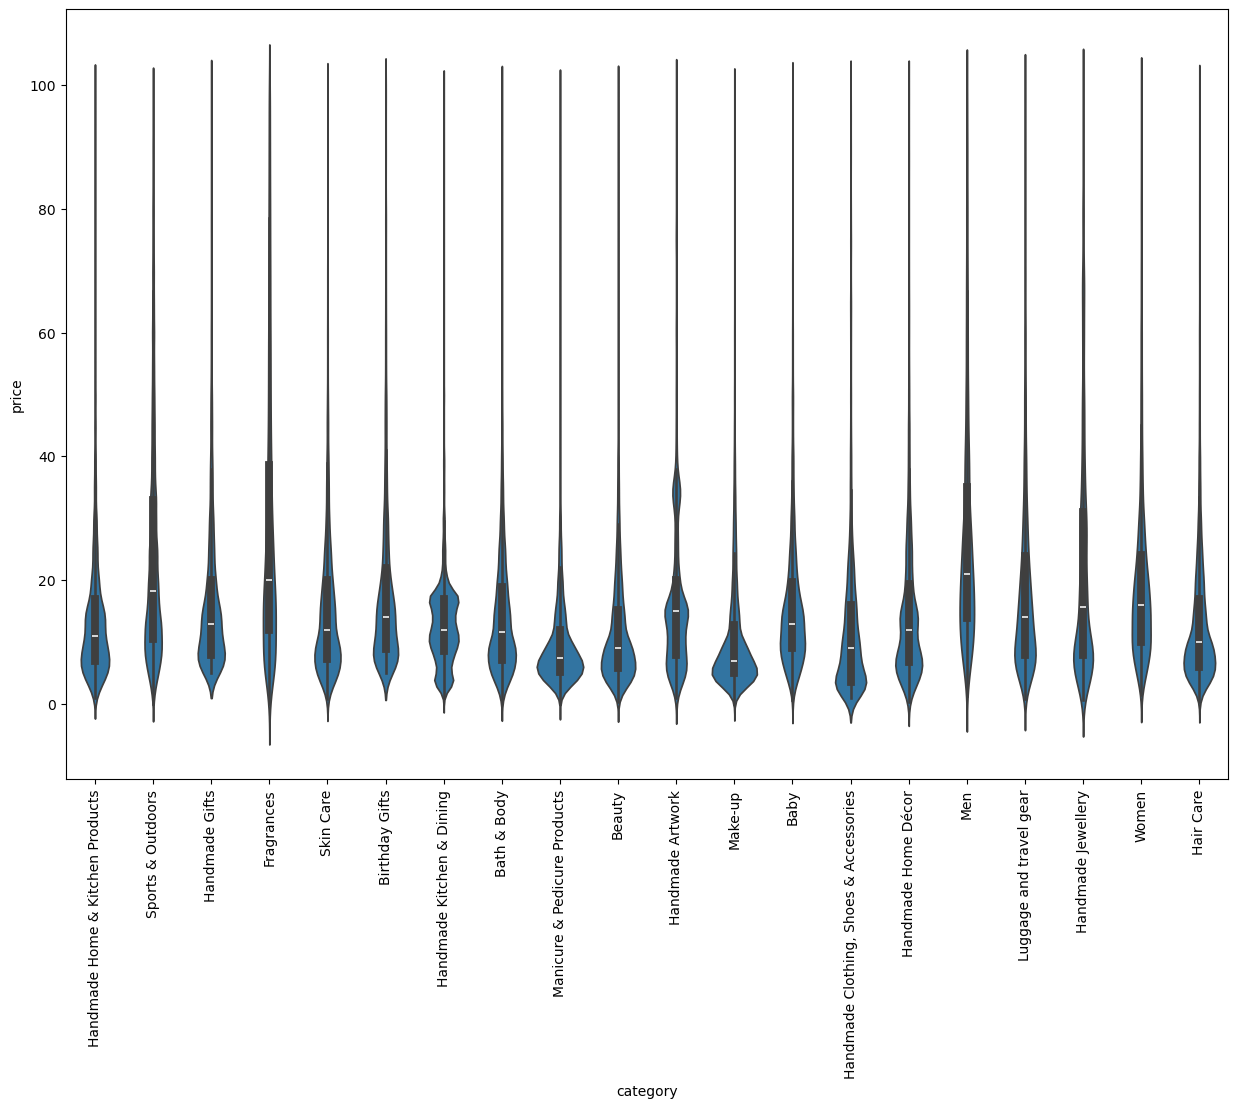

In [55]:
top_20 = filtered_df["category"].value_counts().head(20)
top_20 = top_20.index
df_top_20 = filtered_df[filtered_df["category"].isin(top_20)]
df_top_20
plt.figure(figsize=(15,10))
sns.violinplot(df_top_20, x="category", y="price")
plt.xticks(rotation=90)
plt.show()

In [74]:
median_prices = filtered_df.groupby("category")["price"].median()
median_prices

category
3D Printers                       52.195
3D Printing & Scanning            28.580
Abrasive & Finishing Products     10.150
Action Cameras                    33.135
Adapters                           7.050
                                   ...  
Wind Instruments                  13.470
Window Treatments                 17.990
Women                             15.990
Women's Sports & Outdoor Shoes    45.990
eBook Readers & Accessories       21.990
Name: price, Length: 296, dtype: float64

In [75]:
highest_median_price = median_prices.sort_values(ascending=False).iloc[0]
highest_median_category = median_prices.sort_values(ascending=False).index[0]
print(f"The category with the highest median price is {highest_median_category}")

The category with the highest median price is Desktop PCs


In [ ]:
#Bar Charts:

#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
#Which product category commands the highest average price? Don't filter here by top categories.

C:\Users\crist\AppData\Local\Temp\ipykernel_29700\219282954.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, palette="Set2")


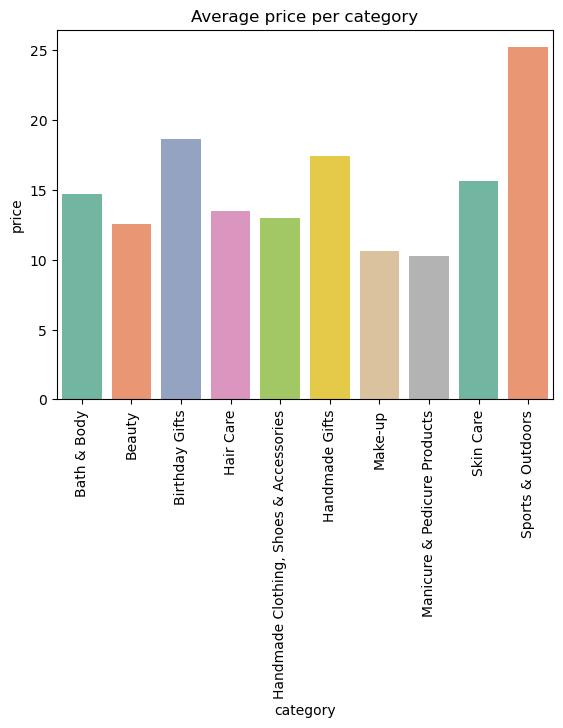

In [87]:
top_10 = filtered_df["category"].value_counts().head(10)
df_top_10 = filtered_df[filtered_df["category"].isin(top_10.index)]
avg_price = df_top_10.groupby("category")["price"].mean()
sns.barplot(data=avg_price, palette="Set2")
plt.xticks(rotation=90)
plt.title("Average price per category")
plt.show()


In [89]:
avgerage_prices = filtered_df.groupby("category")["price"].mean()
highest_avg_price = avgerage_prices.sort_values(ascending=False).iloc[0]
highest_avg_category = avgerage_prices.sort_values(ascending=False).index[0]
print(f"The category with the highest average price is {highest_avg_category}")

The category with the highest average price is Motherboards


In [ ]:
#Box Plots:

#Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

C:\Users\crist\AppData\Local\Temp\ipykernel_29700\840870158.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, x="category", y="stars", palette="Set2")


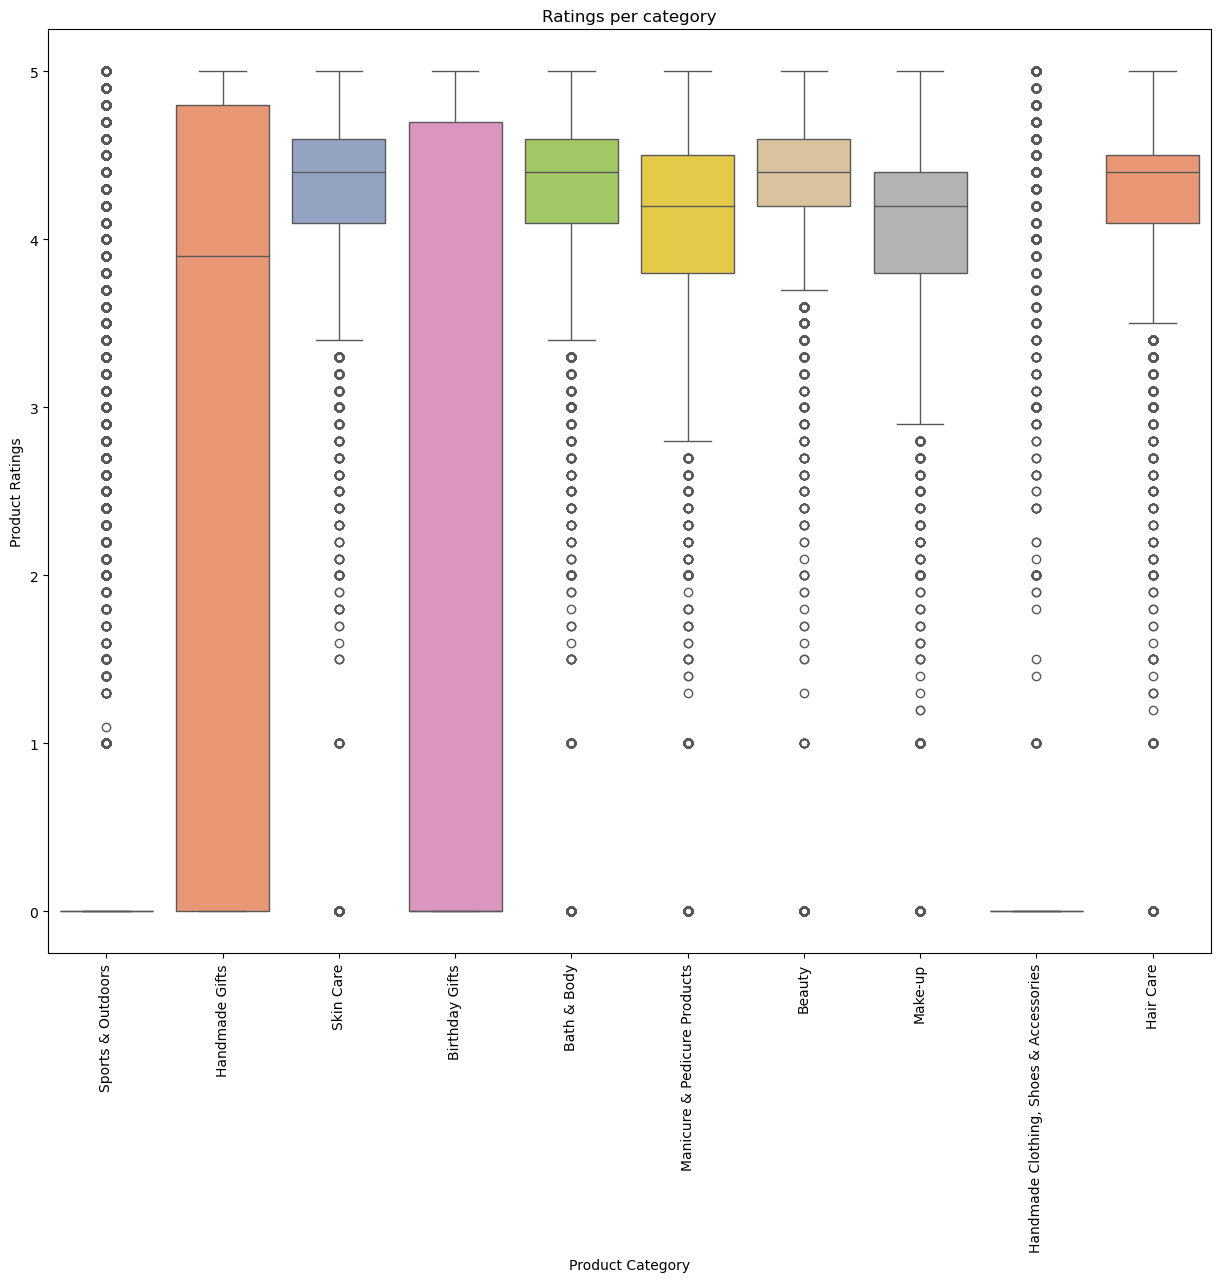

In [105]:
top_10 = filtered_df["category"].value_counts().head(10)
df_top_10 = filtered_df[filtered_df["category"].isin(top_10.index)]
plt.figure(figsize=(15,12))
sns.boxplot(data=df_top_10, x="category", y="stars", palette="Set2")
plt.xticks(rotation=90)
plt.title("Ratings per category")
plt.ylabel("Product Ratings")
plt.xlabel("Product Category")
plt.show()


In [106]:
median_rating = filtered_df.groupby("category")["stars"].median()
highest_median_rating = median_rating.sort_values(ascending=False).iloc[0]
highest_median_category = median_rating.sort_values(ascending=False).index[0]
print(f"The category with the highest average price is {highest_median_category}")

The category with the highest average price is Computer Memory


In [ ]:
#Part 3: Investigating the Interplay Between Product Prices and Ratings
#Objective: Analyze how product ratings (stars) correlate with product prices.

#Correlation Coefficients:

#Calculate the correlation coefficient between price and stars.
#Is there a significant correlation between product price and its rating?

In [108]:
corr = filtered_df["price"].corr(filtered_df["stars"], method="spearman")
corr

-0.06679697280768314

In [ ]:
#Visualizations:

#Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
#Use a correlation heatmap to visualize correlations between all numerical variables.
#Examine if product prices typically follow a normal distribution using a QQ plot.

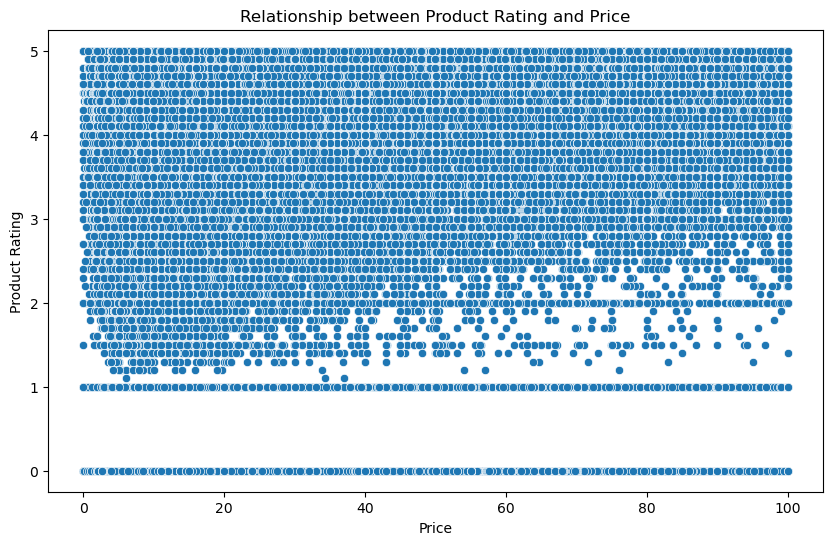

In [114]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x="price", y="stars")
plt.title("Relationship between Product Rating and Price")
plt.xlabel("Price")
plt.ylabel("Product Rating")
plt.show()

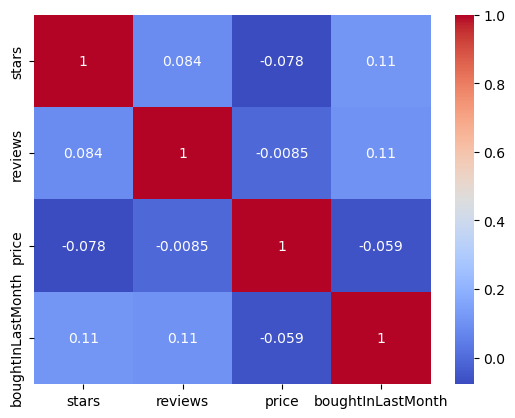

In [116]:
numerical_var = filtered_df.select_dtypes("number")
correlation_matrix = numerical_var.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

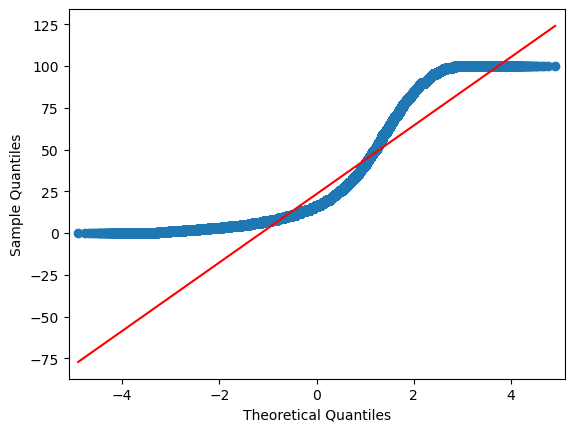

In [119]:
import statsmodels.api as sm
sm.qqplot(filtered_df["price"], line="s")
plt.show()